# Exam
## Problem 2

### Question 1

We are looking into the dynamics of a career choice model, where we are asked to simulate and calculate expected and realized utility, where the graduates know $v_j$ and the distribution of $\epsilon_j$. This is done below.

In [110]:
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt

# Parameters
par = SimpleNamespace()
par.J = 3  # Number of career tracks
par.N = 10  # Number of graduates
par.K = 10000  # Number of simulations
par.sigma = 2  # Standard deviation of noise
par.v = np.array([1, 2, 3])  # Values of each career track
par.c = 1  # Switching cost
par.F = np.arange(1, par.N + 1)  # Array representing the number of friends for each graduate

# Function to calculate utility with noise
def calculate_utility(v, sigma, size):
    return (v) + np.random.normal(0, sigma, size)

# Simulating the expected utility and average realized utility
expected_utilities = np.zeros((par.J, par.N))
realized_utilities = np.zeros((par.J, par.N))

for j in range(par.J):
    for i in range(par.N):
        utilities = calculate_utility(par.v[j], par.sigma, par.K)
        expected_utilities[j, i] = np.mean(utilities)
        realized_utilities[j, i] = np.mean(utilities)

# Display results
for j in range(par.J):
    print(f"Career {j+1}:")
    print(f"  Expected Utility: {np.mean(expected_utilities[j, :]):.2f}")
    print(f"  Realized Utility: {np.mean(realized_utilities[j, :]):.2f}")

Career 1:
  Expected Utility: 1.00
  Realized Utility: 1.00
Career 2:
  Expected Utility: 1.99
  Realized Utility: 1.99
Career 3:
  Expected Utility: 3.00
  Realized Utility: 3.00


We observe that expected and realized utility is identical for each of the seperate career paths. And that utility is highest for career path 3, followed by career path 2 and then 1, as stated in the assignment. As the error term $\epsilon_j$ has expected value of 0, this in turn goes to zero and we are only left with true utility.

### Question 2

We know consider the scenario where $v_j$ is not known to the graudates. Start by calculating and storing the chosen career paths. 

In [118]:
# Utility calculation function
def calculate_utility(vj, sigma, Fi):
    return vj + np.random.normal(0, sigma, Fi)

# Initial simulation results
career_choices = np.zeros((par.N, par.K), dtype=int)
expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Simulate the initial career choice process
for k in range(par.K):
    for i in range(par.N):
        Fi = par.F[i]  # Number of friends
        friends_utilities = np.zeros((par.J, Fi))
        
        for j in range(par.J):
            # Draw utilities for each friend for each career
            friends_utilities[j] = calculate_utility(par.v[j], par.sigma, Fi)
        
        # Calculate prior expected utilities
        prior_expected_utilities = np.mean(friends_utilities, axis=1)
        
        # Draw own noise terms
        own_noise_terms = np.random.normal(0, par.sigma, par.J)
        
        # Total expected utilities
        total_expected_utilities = prior_expected_utilities + own_noise_terms
        
        # Choose the career with the highest expected utility
        chosen_career = np.argmax(total_expected_utilities)
        career_choices[i, k] = chosen_career
        expected_utilities[i, k] = total_expected_utilities[chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + own_noise_terms[chosen_career]

Then I want to calculate the average subjective expectyed utility and the average ex post realized utility, so we get an understanding of the model.

In [117]:
# Calculate the share of graduates choosing each career
career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(career_choices[i] == j)

# Calculate the average subjective expected utility and the average ex post realized utility
avg_expected_utilities = np.mean(expected_utilities, axis=1)
avg_realized_utilities = np.mean(realized_utilities, axis=1)

# Print the average subjective expected utility and the average ex post realized utility
for i in range(par.N):
    print(f"Graduate {i + 1}:")
    print(f"  Average Subjective Expected Utility: {avg_expected_utilities[i]:.4f}")
    print(f"  Average Ex Post Realized Utility: {avg_realized_utilities[i]:.4f}")
    print()


Graduate 1:
  Average Subjective Expected Utility: 4.6028
  Average Ex Post Realized Utility: 3.4426

Graduate 2:
  Average Subjective Expected Utility: 4.2377
  Average Ex Post Realized Utility: 3.5996

Graduate 3:
  Average Subjective Expected Utility: 4.1341
  Average Ex Post Realized Utility: 3.6764

Graduate 4:
  Average Subjective Expected Utility: 4.0692
  Average Ex Post Realized Utility: 3.7427

Graduate 5:
  Average Subjective Expected Utility: 4.0498
  Average Ex Post Realized Utility: 3.7676

Graduate 6:
  Average Subjective Expected Utility: 4.0229
  Average Ex Post Realized Utility: 3.7918

Graduate 7:
  Average Subjective Expected Utility: 4.0004
  Average Ex Post Realized Utility: 3.7938

Graduate 8:
  Average Subjective Expected Utility: 3.9763
  Average Ex Post Realized Utility: 3.8013

Graduate 9:
  Average Subjective Expected Utility: 3.9549
  Average Ex Post Realized Utility: 3.7866

Graduate 10:
  Average Subjective Expected Utility: 3.9588
  Average Ex Post Reali

As we could expect, for each graduate i, as N increaes and the graduate gets more friends, the expected and realized value of utility gets closer.

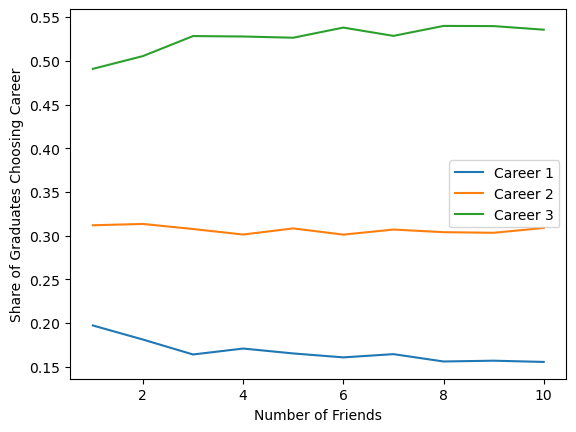

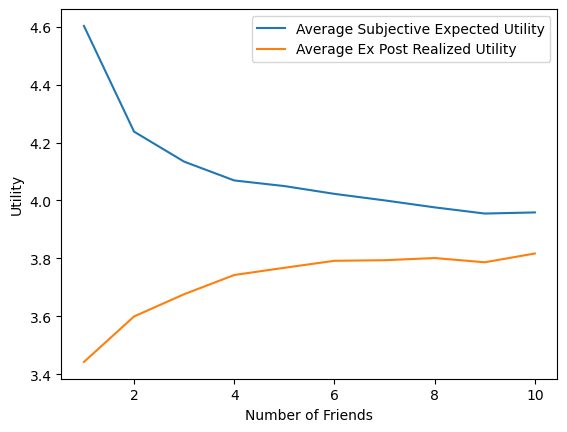

In [119]:
# Plot the share of graduates choosing each career
fig, ax = plt.subplots()
for j in range(par.J):
    ax.plot(par.F, career_shares[:, j], label=f'Career {j + 1}')

ax.set_xlabel('Number of Friends')
ax.set_ylabel('Share of Graduates Choosing Career')
ax.legend()
plt.show()

# Combined plot of the average subjective expected utility and the average ex post realized utility
plt.figure()
plt.plot(par.F, avg_expected_utilities, label='Average Subjective Expected Utility')
plt.plot(par.F, avg_realized_utilities, label='Average Ex Post Realized Utility')
plt.xlabel('Number of Friends')
plt.ylabel('Utility')
plt.legend()
plt.show()


We see, that most graduates choose the career path with highest utility and so on.

### Question 3

In [80]:
# Second-year career choice simulation with switching cost
new_career_choices = np.zeros((par.N, par.K), dtype=int)
new_expected_utilities = np.zeros((par.N, par.K))
new_realized_utilities = np.zeros((par.N, par.K))
switch_decisions = np.zeros((par.N, par.K), dtype=bool)
switch_from_career = np.zeros((par.J, par.N))

for k in range(par.K):
    for i in range(par.N):
        Fi = par.F[i]  # Number of friends
        chosen_career = career_choices[i, k]
        true_utility = realized_utilities[i, k]
        
        # Calculate new prior expected utilities including switching cost
        new_prior_expected_utilities = np.zeros(par.J)
        for j in range(par.J):
            if j == chosen_career:
                new_prior_expected_utilities[j] = true_utility
            else:
                friends_utilities = calculate_utility(par.v[j], par.sigma, Fi)
                prior_utility = np.mean(friends_utilities)
                new_prior_expected_utilities[j] = prior_utility - par.c
        
        # Draw own noise terms for the second choice
        own_noise_terms = np.random.normal(0, par.sigma, par.J)
        total_expected_utilities = new_prior_expected_utilities + own_noise_terms
        
        # Choose the new career with the highest expected utility
        new_chosen_career = np.argmax(total_expected_utilities)
        new_career_choices[i, k] = new_chosen_career
        new_expected_utilities[i, k] = total_expected_utilities[new_chosen_career]
        new_realized_utilities[i, k] = par.v[new_chosen_career] + own_noise_terms[new_chosen_career]
        
        # Record if they decided to switch careers
        switch_decisions[i, k] = (new_chosen_career != chosen_career)
        if new_chosen_career != chosen_career:
            switch_from_career[chosen_career, i] += 1


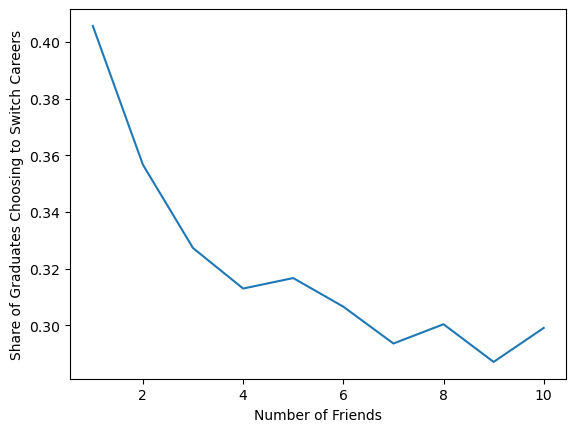

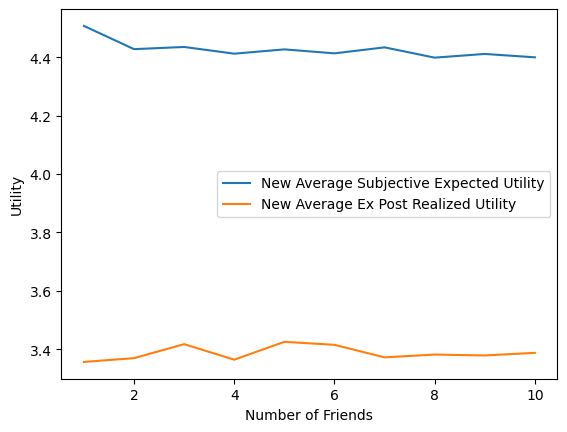

AxisError: axis 1 is out of bounds for array of dimension 1

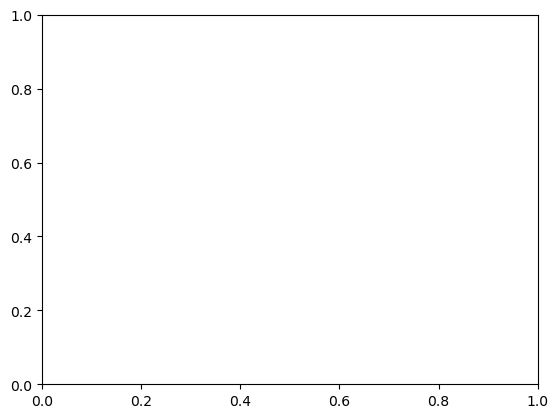

In [81]:
# Calculate the share of graduates choosing to switch careers
switch_shares = np.mean(switch_decisions, axis=1)

# Plot the share of graduates choosing to switch careers
plt.figure()
plt.plot(par.F, switch_shares)
plt.xlabel('Number of Friends')
plt.ylabel('Share of Graduates Choosing to Switch Careers')
plt.show()

# Calculate the new average subjective expected utility and the new average ex post realized utility
new_avg_expected_utilities = np.mean(new_expected_utilities, axis=1)
new_avg_realized_utilities = np.mean(new_realized_utilities, axis=1)

# Combined plot of the new average subjective expected utility and the new average ex post realized utility
plt.figure()
plt.plot(par.F, new_avg_expected_utilities, label='New Average Subjective Expected Utility')
plt.plot(par.F, new_avg_realized_utilities, label='New Average Ex Post Realized Utility')
plt.xlabel('Number of Friends')
plt.ylabel('Utility')
plt.legend()
plt.show()

# Calculate and plot the share of graduates switching from each career
fig, ax = plt.subplots()
for j in range(par.J):
    ax.plot(par.F, np.mean(switch_from_career[j] / par.K, axis=1), label=f'Switched from Career {j + 1}')

ax.set_xlabel('Number of Friends')
ax.set_ylabel('Share of Graduates Switching from Career')
ax.legend()
plt.show()
